# COGS 118A - Final Project

# NBA All-Star Prediction Using Machine Learning

## Group members

- Jonathan Park
- Daniel Lee
- Suebeen Noh
- Franklin Le
- Daniel Renteria

# Abstract

The goal of our project is to use NBA player data to create a machine learning algorithm that will predict the likelihood of a player being an all-star. We will be looking at various player statistics from each regular season from 2011/12 through 2021/22 to predict the likelihood of a player becoming an all-star. Success will be measured by testing created models with earlier stats from players who became all-stars and seeing how accurate the predictions are.

# Background

Around halfway through each NBA season, fans and media members vote on their favorite NBA players to play in the All-Star game. Fans are able to vote through various online means such as the NBA app, NBA website, and via Twitter<a name="voting"></a>[<sup>[1]</sup>](#votinginfo), and represent 50% of the overall vote. Media members and current players make up the other 50%. Being selected as an all-star is a prestigious accomplishment, and many players take pride in the number of all-star games they participated in as a mark of their legacy and impact on basketball.

For teams, it is vital to scout and sign players that they believe have the growth potential to become all-star level players, but do not yet command an enormous salary. This is because the NBA has a salary cap system, where there is a maximum amount of money they are able to spend on player salaries in one season. In the 2021/22 season for example, the salary cap was set to 112.4 million dollars<a name="salary"></a>[<sup>[2]</sup>](#salarycapinfo). This sounds like a lot of money, but when top players make upwards of $50 million by themselves, this salary cap gets filled quickly. Because teams are looking for cheaper players with more growth potential, we believe that we can use machine learning to support the scouting systems already in place.

In terms of prior work already done on this subject, there is already a lot of work being done in this particular field. For example, ESPN created a model in 2017 to predict which draft picks are likely to become all-stars <a name="espn"></a>[<sup>[3]</sup>](#espnpredict). NBA teams often have their own analytics departments, and media outlets such as ESPN also recognize the power of using machine learning and analytics to predict which players have the most potential. We will be working to build off the wealth of knowledge afforded to us and create our own model that works as effectively as any others.

# Problem Statement

The problem we are looking to answer is to predict which NBA players would be classified as all-stars. We will be using a variety of player stats and variables to create a model that can examine the performance of a player, and use that examination to make an educated guess about the likelihood that they will become an all-star. Given that we will be using 10 seasons of player data to build our models, we feel that the volume of data will be adequate to ensure that the model will have a solid base of relatively unbiased data. This problem will be able to be replicated and expanded quite easily by adding more seasons of player data and including a wider range of players. We will also be able to test the model many times because every season there are new all-stars that are selected, and we can use this information to check the accuracy of the player performance model and making accurate all-star predictions.

# Data

The data we will be using will come from an online NBA data resource called basketball-reference.com. This site includes all of the player data we will need from each season. Given that we will be working with 10 seasons of data from 2011/12 through 2021/22, we expect to have a dataset of about 5,000 - 6,000 observations and we will be looking at around 8 - 10 variables.

- Example: https://www.basketball-reference.com/leagues/NBA_2019_per_game.html
- Each season has 500 - 600 observations, so 10 seasons of data will give 5,000 - 6,000 observations.
- Each observation is a player. Each observation has 28 variables, including Games, Team, Points, Rebounds, etc. We will be reducing the number of variables to only include the most relevant ones in determining all-star selection.
- Some critical variables that will be included (but not limited to): Points per Game, 2-Point Percentage, Position, Assists per Game
- The data we will use from basketball reference is already very clean, but likely we will remove any players that were only in the NBA for 1 season (given no growth to track), players with no NBA minutes played, and reduce the number of variables we will be looking at.

In [1]:
# importing data and packages
import pandas as pd
import numpy as np
NBA_Data = pd.DataFrame()
All_Stars = pd.read_csv('DATA/NBA_ALL_STARS.csv', encoding = "ISO-8859-1")

# cleaning data columns, choosing which columns are to be used
per_game_cols = ['TRB', 'AST','BLK','PTS']
advanced_cols_to_use = ['3PAr', 'AST%', 'BLK%', 'BPM', 'DBPM', 'DRB%', 'DWS', 'FTr', 'OBPM',
       'ORB%', 'OWS', 'PER', 'STL%', 'TOV%', 'TRB%', 'TS%', 'USG%', 'VORP',
       'WS', 'WS/48']
pergame_rename = {'TRB': 'Rebounds Per Game', 'AST': 'Assists Per Game', 'BLK': 'Blocks Per Game','PTS': 'Points Per Game'}
pergame_cols_to_use = ['Rebounds Per Game', 'Assists Per Game', 'Blocks Per Game','Points Per Game']

def name_change(a):
    name = a.split('\\')[0]
    if '*' in name:
        name = name.split('*')[0]
    return name

for i in range(13):
    #reading files
    basic = pd.read_csv(f'DATA/NBA_STATS_{2010+i}.csv')
    advanced = pd.read_csv(f'DATA/AD_NBA_STATS_{2010+i}.csv')
    pergame = pd.read_csv(f'DATA/NBA_PerGame_{2010+i}.csv')
    #adding features to basic df
    basic = pd.concat([basic, advanced[advanced_cols_to_use]],axis=1)
    #renaming to avoid confusion
    pergame.rename(columns=pergame_rename, inplace=True)
    #adding features to basic df
    basic = pd.concat([basic, pergame[pergame_cols_to_use]],axis=1)
    #dropping duplicates
    basic.drop_duplicates(subset=['Player'], keep='first', inplace = True)
    #renaming players
    basic['Player'] = basic['Player'].apply(lambda x: name_change(x))
    #adding y value
    basic['All Stars'] = basic['Player'].isin(All_Stars[str(2010+i)]).astype(int)
    NBA_Data = pd.concat([NBA_Data, basic], axis=0)

In [2]:
#dropping duplicates, and unnecessary data
renameColumns = {'2P%': '2 Point Field Goal Percentage', '3P%': '3 Point Field Goal Percentage', 
                 'AST': 'Assists', 'PER': 'Player Efficiency Rating','TS%': 'True Shooting Percentage',
                 'USG%': 'Usage Percentage', 'WS/48': 'Win Shares Per 48 Minutes',
                 }
NBA_Data.rename(columns=renameColumns, inplace=True)
relevant_cols = ['Player', '3 Point Field Goal Percentage', '2 Point Field Goal Percentage', 
                'Player Efficiency Rating', 'True Shooting Percentage', 'Usage Percentage',
                'Win Shares Per 48 Minutes', 'Rebounds Per Game', 'All Stars','Assists Per Game',
                'Blocks Per Game', 'Points Per Game']
NBA_Data = NBA_Data[relevant_cols]
NBA_Data.sort_values('Player', ascending=False, inplace=True)
NBA_Data.reset_index(drop=True, inplace=True)
temp = NBA_Data['All Stars']
NBA_Data.drop(columns=['All Stars','Player'],inplace=True)
NBA_Data.insert(0,'All Stars',temp)
NBA_Data.fillna(0, inplace=True)

In [3]:
NBA_Data

,All Stars,3 Point Field Goal Percentage,2 Point Field Goal Percentage,Player Efficiency Rating,True Shooting Percentage,Usage Percentage,Win Shares Per 48 Minutes,Rebounds Per Game,Assists Per Game,Blocks Per Game,Points Per Game
0,0,0.000,0.533,11.0,0.551,11.4,0.070,6.1,0.4,0.3,4.0
1,0,0.000,0.532,14.0,0.570,13.8,0.121,7.9,0.5,0.8,5.8
2,0,0.000,0.553,11.8,0.559,12.5,0.130,3.7,0.4,0.7,2.8
3,0,0.000,0.409,3.1,0.397,8.7,-0.021,2.6,0.2,0.2,1.2
4,0,0.000,0.477,9.8,0.517,8.8,0.100,5.3,0.5,0.3,2.7
...,...,...,...,...,...,...,...,...,...,...,...
6516,0,0.275,0.427,10.7,0.454,22.7,0.020,1.4,2.2,0.0,6.5
6517,0,0.350,0.427,12.4,0.501,18.0,0.084,2.0,3.6,0.1,7.7
6518,0,0.295,0.384,11.5,0.454,17.7,0.063,1.4,2.0,0.0,3.9
6519,0,0.273,0.542,9.7,0.469,23.2,-0.012,0.4,0.5,0.0,1.6


# Proposed Solution

The problem statement is to create a machine learning program that could predict the success of a player based on their stats, measuring success as being part of an all-star team selection. We will use past all stars as the training subjects and test on this year’s all stars to determine how accurate the program is. One way that we can program this machine learning algorithm is by creating a boundary line that can separate non-allstars from all-stars.

This might not be a viable solution due to the sheer number of ways players can impact winning basketball, but since nba all-stars historically are chosen due to their offensive impact, creating a boundary that favors offensive statistics like points and assists may help in creating a more accurate boundary. If there happens to be more than the total amount of all-star selections available, the program can choose players that are farther away from the boundary relative to other players and vice versa for the opposite scenario.

One way we can predict the likelihood of an NBA player becoming an All Star is by using SVM Linear Kernel. We use this because the data that we have is linearly separable, classifying between All Stars and Non All Stars. Due to the number of dimensions being much greater than the number of samples makes this method most effective. In this case, there are 10 features for every player being taken into consideration. Keep in mind that this takes into account these players over the course of 10 seasons resulting in well over 5000 observations. With these observations, SVM will be able to find the most similar examples between the two classes which would be players with highest likelihood of becoming an All Star and the least similar examples being the opposite.

Another option would be to use Decision Tree algorithms referred to as CART or Classification and Regression Trees. With our dataset, we can predict an NBA player’s likelihood of  becoming an All Star using the 10 most critical features of a player in our model. We’d be able to use recursive binary splitting in order to train and test different split points using a cost function. CART will be able to implicitly perform variable screening as well as feature selection. An advantage to this model is its ability to classify non-linearly separable data effectively. In the case of overfitting, pruning may be necessary but because we’ve already removed the features of low importance, the complexity of the tree should be reduced significantly. This leads to increased predictive power of whether a player will become an All Star or not. 

Lastly, we plan on using logistic regression to predict the probability of a future NBA All Star with 1 = yes and 0 = no using the most critical features within a player. These features would include '3 Point Field Goal Percentage', '2 Point Field Goal Percentage', 'Player Efficiency Rating', and 7 other stats that have high impact on All Star selection. A way to approach the problem statement with logistic regression is to create two models for past All Stars and the rest of the NBA players using their respective stats. Once we compare them, NBA players who are most similar to past All Stars will have a much more likely chance of becoming an All Star later. Something to be concerned about is the case where there are too many good players in a given position since there are limited spots for each position for All Star selection. Differentiating players off their positions may be a solution but results and accuracy will take a hit.

# Evaluation Metrics

One metric that we'll be using is Precision. The reason we'll be using Precision is because there are more NBA Players that do not become All Stars than those who do. Since this process is highly selective, we believe that there will be various false positives in our datasets due to similar player stats. Recall is another metric that we’ll use to find all relevant cases within the dataset being players that are actual All Stars. With these metrics, we'd be able to figure out the F1-Score which allows us to see where the cut off is in our model. This score will be important as it will give us a measure of how accurate our classification model is. Due to our data being extremely unbalanced, we went against ROC.

Precision: $$ \frac{True \ Positive}{True \ Positive \ + False \ Positive} $$

Recall: $$ \frac{True \ Positive}{True \ Positive \ + False \ Neative} $$

F1-Score: $$F_{1} = 2(\frac{Precision \cdot Recall}{Precision + Recall}) $$

 
For SVM and CART, the evaluation metric of cross validation is important for estimating the skill of these models on unseen data. Since there are 6000 NBA players and only 300 MBA, the score is going to be high since the true negative offputs the false negatives. That's the reason we use Precision. Recall is the balance between accuracy and precision.

# Results

To solve the problem of predicting whether a player can be an all-star given specific stats, we created three different models and compared them against each other to see which would be the most effective and sound. As aforementioned, these models were a prediction algorithm using Logistic Regression, and two classification algorithms with a Linear Support Vector Machine and Decision Tree. The various results are shown below, of which we decided that the Linear SVM would be the best fit for the scope of our investigation and for our data.


## Logistic Regression

At first, we tried a prediction of All-Star vs Non All-Star using a Logistic Regression model. 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = NBA_Data.loc[:, NBA_Data.columns != 'All Stars']
y = NBA_Data['All Stars']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
clf = LogisticRegression(class_weight='balanced',random_state=0, max_iter=1000).fit(x_train, y_train.values.ravel())
clf.score(x_test, y_test)

0.9160024524831392

In [5]:
from sklearn.metrics import classification_report
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1560
           1       0.34      0.94      0.49        71

    accuracy                           0.92      1631
   macro avg       0.67      0.93      0.72      1631
weighted avg       0.97      0.92      0.93      1631



Although our clf score was high, we can see from the classification report that model was not good at predicting all stars. 
It only scored high because of the large amount of non allstars compared to allstars.

In [6]:
y.value_counts()

0    6199
1     322
Name: All Stars, dtype: int64

In [7]:
# Tried to fix the problem with Random Undersampling

new_Data = NBA_Data[NBA_Data['All Stars'] != 1].sample(322)
Smaller_Sample = pd.concat([new_Data,NBA_Data[NBA_Data['All Stars'] == 1]] , axis=0)

Smaller_Sample['All Stars'].value_counts()

new_X = Smaller_Sample.loc[:, Smaller_Sample.columns != 'All Stars']
new_y = Smaller_Sample.loc[:, Smaller_Sample.columns == 'All Stars']

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.25, random_state=0)
new_clf = LogisticRegression(random_state=0, max_iter=5000).fit(new_x_train, new_y_train.values.ravel())

new_clf.score(new_x_test, new_y_test)

0.9006211180124224

In [8]:
new_y_pred = new_clf.predict(new_x_test)
print(classification_report(new_y_test, new_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        79
           1       0.90      0.90      0.90        82

    accuracy                           0.90       161
   macro avg       0.90      0.90      0.90       161
weighted avg       0.90      0.90      0.90       161



However the model is not really good at generalizing the data, which means that it is still not fixing the problem of the data being unbalanced.

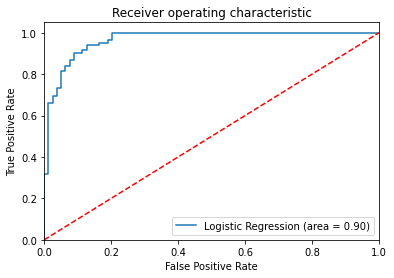

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(new_y_test, new_clf.predict(new_x_test))
fpr, tpr, thresholds = roc_curve(new_y_test, new_clf.predict_proba(new_x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Linear SVM and Decision Tree

We then used a Support Vector Machine with a linear kernel, as well as trying to implement a Decision Tree to examine which of these classification algorithms would be the most fitting for our data.

In [10]:
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
# Creating an 80/20 training and testing split with the data
X = NBA_Data.iloc[0:,1:]
y = NBA_Data['All Stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

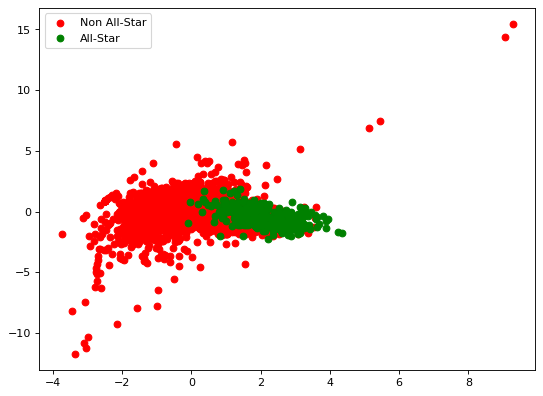

In [12]:
# Print scatter plot to view the simplified dataset

from sklearn.decomposition import PCA
from itertools import cycle

pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

colors = cycle('rgb')
target_names = [0, 1]

plt.figure(figsize=(8, 6), dpi=80)

target_list = np.array(y).flatten()

for t_name, c in zip(target_names, colors):
    plt.scatter(X_pca[target_list == t_name, 0], X_pca[target_list ==t_name, 1], c=c, label=t_name)

legend = plt.legend()
legend.get_texts()[0].set_text("Non All-Star")
legend.get_texts()[1].set_text("All-Star")
plt.show()

The plot above displays the distribution of the data that we are working with for the classification models. The green bubbles represent all-star players, while the red dots are non all-stars. This plot was created using Principal Component Analysis which allows for our multi-featured data to be represented as a two-dimensional plot. We can see that the overall distributions of all-stars are fairly close together, but not an exactly linear classification difference.

In [13]:
# Create a Linear SVC
lsvc = LinearSVC(dual=False).fit(X_train, y_train.ravel())

We used a 5-folds cross validation to test both the precision and F1 score of our model. From the SVM Linear Kernel, the model returned as a 0.79 precision rate, while the calculated F1 score was about 0.61. This was not ideal for our classification modeling, but still we thought was somewhat satisfactory compared to the Precision and F1 score of the Logistic Regression model (without random undersampling).

In [14]:
# Use K-folds cross validation to test model robustness
print('Linear SVC Precision', cross_val_score(lsvc, X, y, scoring='precision',cv=5).mean())
print('Linear SVC F1', cross_val_score(lsvc, X, y, scoring='f1',cv=5).mean())

Linear SVC Precision 0.7904589663210353
Linear SVC F1 0.6086604915819616


Following the results of the Linear SVM, we decided to try to create a decision tree as well to see if this would be a better classification algorithm from our data. The results we found for the decision tree was a Precision score of about 0.74 and F1 Score of about 0.63.

In [15]:
# Create a Decision Tree
dtree = tree.DecisionTreeClassifier(max_depth=3,random_state=42).fit(X_train,y_train)

# Use K-folds cross validation to test model robustness
print('Decision Tree Precision', cross_val_score(dtree, X, y, scoring='precision',cv=5).mean())
print('Decision Tree F1', cross_val_score(dtree, X, y, scoring='f1',cv=5).mean())

Decision Tree Precision 0.7464064040534628
Decision Tree F1 0.6333856801925558


# Discussion

### Interpreting the result

Our results suggest that SVM Linear Kernel is the best model to predict the likelihood of a NBA player being an all-star. Through finding the precision score for all models, which the SVM Linear Kernel had the highest precision score of 0.79. Some other important points were:

- Decision tree: The F-1 score is higher in decision compared to svm; however, since precision is the best tool to measure our classfication model, decision tree is not the best model to predict the likelihood.


- Logistic: When making the model for logistic regression, we realized that the model was not good at generalizing to other data. This was seen from the low precision and f-score.


- Evaluation metrics: Due to our data being unabalanced, the true negative offputs the false negatives. Therefore, precison score would be the most accruate tool to measure our classifcation model.


### Limitations

One of the major limitations that we experienced was unbalanced data. Since there was so many more non-all stars relative to all stars, the models were "ignoring" the data points that were all stars, which made the models unreliable. This particularly affected our Logistic Regression model. 

Another limitation was the data that we were measuring itself. What we mean by this is that all-star selections are voted in by positions, meaning that the best N-number of players at X, Y, Z positions can be all-stars. This means that if the best perfoming 10 players in the NBA one season were all point guards, only 4 of them would able to be all-stars despite the other 6 being ranked in the top 10 overall. This could lead to some high-performance seasons being counted as non all-stars while some less impressive ones could be voted in. This leads to a higher variance of performance levels in our dataset classifying all-stars and non all-stars, which dilutes the precision of our classification models.

### Ethics & Privacy

Our datasets are from a public datasets with credible sources and not violating any privacy or terms of use agreement. Also, our datasets are not in the format of self-reported nor survey which removes any forms of biases. Most of our data is based on accurate statistical seasonal records of players from the NBA itself and other credible sources that put the focus only on the NBA statistics. The statistical seasonal records of NBA players is not used to expose any personal information nor criticize the players, but to help to analyze the statistics seasonal records of NBA players and predict who would be the next all-star player.

### Conclusion

In conclusion, we found that using a Linear SVM Kernel classification algorithm was the best model that we created to try to predict whether a player an all-star. Given the large amount of machine learning projects and the strong influence of data-driven analytics in the NBA, we feel that the work we have completed through this project can be used as a simple starting point for beginners who are interested in this field to examine and see what is possible. We recognize that the results we attained were not the most precise or most accurate, however we feel that it is a solid foundational representation of the ways in which machine learning can be utilized for all kinds of fields, especially in the sports world.

# Footnotes
<a name="votinginfo"></a>1.[^](#voting): Greer, J. (20 Jan 2022) NBA All-Star voting 2022: How it works, fan vote end date, latest results & leaders. *The Sporting News*. https://www.sportingnews.com/us/nba/news/nba-all-star-voting-2022-how-it-works-leaders-results-end-date/1ubkauu43tcfq1xoqp80sck14g<br> 
<a name="salarycapinfo"></a>2.[^](#salary): NBA. (2 Aug 2021) Salary cap set at Hundred twelve point four million for 2021-22 season. *NBA*. https://www.nba.com/news/salary-cap-set-at-112-4-million-for-2021-22-season<br>
<a name="espnpredict"></a>3.[^](#espn): Sabin, P. (20 Jun 2017) Analytics help separate the All-Stars from the potential busts. *ESPN*. https://www.espn.com/nba/story/_/id/19681478/most-likely-all-stars-starters-role-players-top-2017-nba-draft<br>